In [14]:
import csv
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from scipy.interpolate import interp1d

def tf(x):
    return(np.log10(x))

def decader(x):
    return(x -x%10)

from itertools import groupby
from operator import itemgetter
import pickle as pkl
import re



def patternmaker(x):
    x=np.array(x.notnull())
    x=x.astype(int)
    #print(x)
    val = ''.join(map(str, x))
    #print(val)
    return val

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmamaker_mod(word):
    return lemmatizer.lemmatize(word["modifier"],word.m_pos)+"_"+word.m_pos


def lemmamaker_head(word):

    return lemmatizer.lemmatize(word["head"],word.h_pos)+"_"+word.h_pos


pd.set_option('display.float_format', lambda x: '%.3f' % x)
decades=[2000, 1990, 1980, 1970, 1960, 1950, 1940, 1930, 1920, 1900, 1910,
            1890, 1880, 1870, 1850, 1860, 1840, 1830, 1820, 1810, 1800]
replacements={'h_pos':dict(zip(["NOUN","VERB","ADJ"],['n','v','a'])),'m_pos':dict(zip(["NOUN","VERB","ADJ"],['n','v','a']))}

In [2]:
bigram   = pd.read_csv('http://storage.googleapis.com/books/ngrams/books/googlebooks-eng-all-2gram-20120701-aa.gz', compression='gzip', header=None, sep="\t", quotechar='"',usecols=[0,1,2])
bigram.columns=['bigram_pos','year','count']
bigram

,bigram_pos,year,count
0,A'a /,1803,1
1,A'a /,1808,1
2,A'a /,1811,1
3,A'a /,1813,1
4,A'a /,1814,1
5,A'a /,1819,1
6,A'a /,1825,1
7,A'a /,1833,1
8,A'a /,1834,1
9,A'a /,1841,1


In [30]:
bigram   = pd.read_csv('http://storage.googleapis.com/books/ngrams/books/googlebooks-eng-all-2gram-20120701-ab.gz', compression='gzip', header=None, sep="\t", quotechar='"',usecols=[0,1,2])
bigram.columns=['bigram_pos','year','count']

bigram['modifier_pos'],bigram['head_pos']=bigram['bigram_pos'].str.split(" ",1).str
bigram.drop(["bigram_pos"],axis=1,inplace=True)
bigram['modifier'], bigram['m_pos'] = bigram['modifier_pos'].str.split('_', 1).str
bigram.drop(["modifier_pos"],axis=1,inplace=True)
bigram['head'], bigram['h_pos'] = bigram['head_pos'].str.split('_', 1).str
bigram.drop(["head_pos"],axis=1,inplace=True)
display(bigram.head(10))
bigram.tail(10)

KeyboardInterrupt: 

In [4]:
modifier_pos_counts=bigram.m_pos.value_counts().to_frame()
modifier_pos_counts['perc']=round((modifier_pos_counts.m_pos/modifier_pos_counts.m_pos.sum())*100,3)
print("Nouns, verbs and adjectives account for ",round(modifier_pos_counts.loc[["NOUN","VERB","ADJ"]].perc.sum(),3),"% of the modifiers")

modifier_pos_counts

Nouns, verbs and adjectives account for  62.769 % of the modifiers


,m_pos,perc
NOUN,1359874,38.369
ADJ,651900,18.393
ADP,489301,13.806
DET,259147,7.312
ADV,222067,6.266
VERB,212912,6.007
X,161088,4.545
NUM,68029,1.919
.,38896,1.097
CONJ,37916,1.070


In [5]:
head_pos_counts=bigram.h_pos.value_counts().to_frame()
head_pos_counts['perc']=round((head_pos_counts.h_pos/head_pos_counts.h_pos.sum())*100,3)
print("Nouns, verbs and adjectives account for ",round(head_pos_counts.loc[["NOUN","VERB","ADJ"]].perc.sum(),3),"% of the heads")

head_pos_counts

Nouns, verbs and adjectives account for  35.261 % of the heads


,h_pos,perc
NOUN,726681,20.819
.,445275,12.757
._,321242,9.203
VERB,298819,8.561
NOUN_,230195,6.595
ADJ,205266,5.881
ADP,159314,4.564
NUM,151667,4.345
VERB_,107677,3.085
ADP_,94237,2.700


The bigram dataset needs be cleaned. This involves -

1. Selecting only modifiers and heads that are tagged as NOUN, ADJ and VRB (can be changed later to add ADV)
2. Merging years to decades
3. Selecting only decades from 1800 to 2000.
 

In [6]:
bigram=bigram.loc[(bigram.m_pos.isin(["NOUN","VERB","ADJ"])) & (bigram.h_pos.isin(["NOUN","VERB","ADJ"]))]
bigram['decade']=bigram.year.apply(decader)
bigram.drop(["year"],axis=1,inplace=True)

display(bigram.head(10))
bigram.tail(10)

,count,modifier,m_pos,head,h_pos,decade
539,3,A.A.,NOUN,American,NOUN,1930
540,5,A.A.,NOUN,American,NOUN,1940
541,2,A.A.,NOUN,American,NOUN,1940
542,3,A.A.,NOUN,American,NOUN,1940
543,1,A.A.,NOUN,American,NOUN,1940
544,2,A.A.,NOUN,American,NOUN,1950
545,2,A.A.,NOUN,American,NOUN,1950
546,1,A.A.,NOUN,American,NOUN,1950
547,1,A.A.,NOUN,American,NOUN,1960
548,1,A.A.,NOUN,American,NOUN,1960


,count,modifier,m_pos,head,h_pos,decade
5849973,1,aa,NOUN,might,VERB,1990
5849974,1,aa,NOUN,might,VERB,1990
5849975,2,aa,NOUN,might,VERB,2000
5849976,3,aa,NOUN,might,VERB,2000
5849977,2,aa,NOUN,might,VERB,2000
5849978,3,aa,NOUN,might,VERB,2000
5849979,2,aa,NOUN,might,VERB,2000
5849980,1,aa,NOUN,might,VERB,2000
5849981,5,aa,NOUN,might,VERB,2000
5849982,19,aa,NOUN,might,VERB,2000


In [7]:
decade_counts=bigram.decade.value_counts().to_frame()
decade_counts['perc']=round((decade_counts.decade/decade_counts.decade.sum())*100,3)
print("Words from decades 1520 to 1790 represent",round(decade_counts.iloc[21:].perc.sum(),3),"% of the current dataset")
decade_counts

Words from decades 1520 to 1790 represent 0.723 % of the current dataset


,decade,perc
2000,96910,18.117
1990,92179,17.232
1980,75963,14.201
1970,61592,11.514
1960,43030,8.044
1950,28570,5.341
1940,19357,3.619
1930,14734,2.754
1900,12841,2.401
1920,12618,2.359


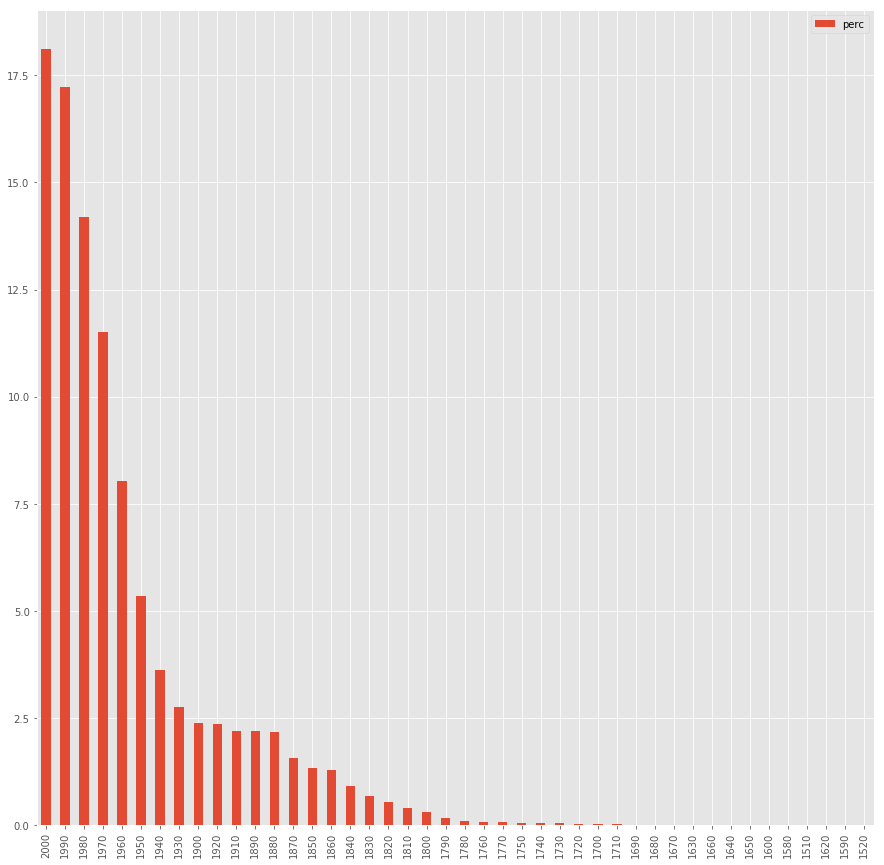

In [8]:
decade_counts.drop('decade',axis=1).plot.bar(figsize=(15,15))

In [9]:
bigram=bigram.loc[bigram.decade.isin(decades)]
bigram=bigram.loc[(bigram.modifier.str.match('^[a-zA-Z]+$') & (bigram["head"].str.match('^[a-zA-Z]+$')))]
bigram.modifier=bigram.modifier.str.lower()
bigram["head"]=bigram["head"].str.lower()
display(bigram.head(10))
bigram.tail(10)

,count,modifier,m_pos,head,h_pos,decade
1840,20,aaa,NOUN,blair,NOUN,1990
1841,25,aaa,NOUN,blair,NOUN,2000
1842,28,aaa,NOUN,blair,NOUN,2000
1879,1,aaa,NOUN,county,NOUN,1930
1880,1,aaa,NOUN,county,NOUN,1930
1881,1,aaa,NOUN,county,NOUN,1940
1882,4,aaa,NOUN,county,NOUN,1940
1883,3,aaa,NOUN,county,NOUN,1940
1884,2,aaa,NOUN,county,NOUN,1940
1885,2,aaa,NOUN,county,NOUN,1940


,count,modifier,m_pos,head,h_pos,decade
5849973,1,aa,NOUN,might,VERB,1990
5849974,1,aa,NOUN,might,VERB,1990
5849975,2,aa,NOUN,might,VERB,2000
5849976,3,aa,NOUN,might,VERB,2000
5849977,2,aa,NOUN,might,VERB,2000
5849978,3,aa,NOUN,might,VERB,2000
5849979,2,aa,NOUN,might,VERB,2000
5849980,1,aa,NOUN,might,VERB,2000
5849981,5,aa,NOUN,might,VERB,2000
5849982,19,aa,NOUN,might,VERB,2000


In [10]:
bigram.replace(replacements,inplace=True)
bigram=bigram.groupby(['modifier','m_pos','head','h_pos','decade'])['count'].sum().to_frame()
bigram=bigram.reset_index(level=['modifier','m_pos','head','h_pos','decade'])


In [17]:
temp_mod=bigram[["modifier","m_pos"]].drop_duplicates()
temp_mod['lemma_mod']=temp_mod.apply(lemmamaker_mod,axis=1)
temp_mod

,modifier,m_pos
0,a,a
40739,aa,a
40931,aa,n
47521,aa,v
48426,aaa,a
48519,aaa,n
52683,aaa,v
52736,aaaa,n
52934,aaaaa,n
53040,aaaaaa,n


In [22]:
temp_head=bigram[["head","h_pos"]].drop_duplicates()
temp_head['lemma_head']=temp_head.apply(lemmamaker_head,axis=1)
temp_head

,head,h_pos,lemma_head
0,a,a,a_a
13,a,n,a_n
31,ab,n,ab_n
39,able,a,able_a
53,above,a,above_a
62,absorption,n,absorption_n
69,according,v,accord_v
79,accounts,n,account_n
86,action,n,action_n
95,activated,a,activated_a


In [25]:
lemma_replacements={'modifier':dict(zip(temp_mod.modifier,temp_mod.lemma_mod)),'head':dict(zip(temp_head['head'],temp_head.lemma_head))}

In [29]:
#bigram.replace(lemma_replacements,inplace=True)
bigram.groupby(['modifier','head','decade'])['count'].sum().to_frame()

count
modifier   head        decade       
a_a        a_n         1810        2
                       1840        3
                       1850        3
                       1860        2
                       1870        4
                       1880        5
                       1890        6
                       1900        7
                       1910       17
                       1920       10
                       1930       27
                       1940       41
                       1950       66
                       1960       81
                       1970      106
                       1980      185
                       1990      273
                       2000      262
           ab_n        1810        1
                       1920        1
                       1950       16
                       1960       33
                       1970       41
                       1980       20
                       1990       39
                       2000       86
           able_a      1850        3
                       1870        1
                       1890        1
                       1900        2
...                              ...
aay_v      take_v      2000        3
           vary_v      1920        1
                       1930        5
                       1940        6
                       1950        8
                       1960        3
                       1970        6
                       1980       21
                       1990        9
                       2000        1
aaya_v     see_v       1980        2
                       1990       52
                       2000      109
aazamieh_n secondary_n 1960       14
                       1970       31
                       1980        6
                       1990        1
aazaz_n    be_v        1850       11
                       1860       10
                       1870        1
                       1880       12
                       1890        5
                       1900        4
                       1910        1
                       1970        3
                       2000        3
aazpa_n    regional_n  1970       29
                       1980       99
                       1990       87
                       2000       17

[75538 rows x 1 columns]

In [22]:
bigram.replace(replacements,inplace=True)
bigram=bigram.groupby(['modifier','m_pos','head','h_pos','decade'])['count'].sum().to_frame()
bigram=bigram.reset_index(level=['modifier','m_pos','head','h_pos','decade'])

bigram['head_temp']=bigram[["head","h_pos"]].apply(lemmamaker,axis=1)
bigram.drop(["head"],axis=1,inplace=True)


bigram['modifier_temp']=bigram[["modifier","m_pos"]].apply(lemmamaker,axis=1)
bigram.drop(["modifier"],axis=1,inplace=True)

bigram['head']=bigram['head_temp'].astype(str) + '_' + bigram['h_pos'].astype(str)
bigram.drop(["head_temp","h_pos"],axis=1,inplace=True)

bigram['modifier']=bigram['modifier_temp'].astype(str) + '_' + bigram['m_pos'].astype(str)
bigram.drop(["modifier_temp","m_pos"],axis=1,inplace=True)

bigram=bigram.groupby(['modifier','head','decade'])['count'].sum().to_frame()
bigram=bigram.reset_index(level=['modifier','head','decade'])
display(bigram.head(10))
bigram.tail(10)

,modifier,head,decade,count
0,a_a,a_a,1810,1
1,a_a,a_a,1870,1
2,a_a,a_a,1900,1
3,a_a,a_a,1910,6
4,a_a,a_a,1920,1
5,a_a,a_a,1930,12
6,a_a,a_a,1940,14
7,a_a,a_a,1950,18
8,a_a,a_a,1960,16
9,a_a,a_a,1970,11


,modifier,head,decade,count
80770,aazaz_n,be_v,1880,12
80771,aazaz_n,be_v,1890,5
80772,aazaz_n,be_v,1900,4
80773,aazaz_n,be_v,1910,1
80774,aazaz_n,be_v,1970,3
80775,aazaz_n,be_v,2000,3
80776,aazpa_n,regional_n,1970,29
80777,aazpa_n,regional_n,1980,99
80778,aazpa_n,regional_n,1990,87
80779,aazpa_n,regional_n,2000,17


In [23]:
bigram["count"].describe()

count   80780.000
mean       46.782
std       356.629
min         1.000
25%         3.000
50%         8.000
75%        26.000
max     40233.000
Name: count, dtype: float64

In [24]:
#unigram=unigram[unigram.unigram.str.contains("'")==False]
bigram=bigram[bigram['count']>=3]
display(bigram.head(10))
bigram.tail(10)

,modifier,head,decade,count
3,a_a,a_a,1910,6
5,a_a,a_a,1930,12
6,a_a,a_a,1940,14
7,a_a,a_a,1950,18
8,a_a,a_a,1960,16
9,a_a,a_a,1970,11
10,a_a,a_a,1980,43
11,a_a,a_a,1990,100
12,a_a,a_a,2000,74
14,a_a,a_n,1840,3


,modifier,head,decade,count
80768,aazaz_n,be_v,1860,10
80770,aazaz_n,be_v,1880,12
80771,aazaz_n,be_v,1890,5
80772,aazaz_n,be_v,1900,4
80774,aazaz_n,be_v,1970,3
80775,aazaz_n,be_v,2000,3
80776,aazpa_n,regional_n,1970,29
80777,aazpa_n,regional_n,1980,99
80778,aazpa_n,regional_n,1990,87
80779,aazpa_n,regional_n,2000,17


In [25]:
bigram.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61382 entries, 3 to 80779
Data columns (total 4 columns):
modifier    61382 non-null object
head        61382 non-null object
decade      61382 non-null int64
count       61382 non-null int64
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [26]:
bigram=pd.pivot_table(bigram,index=['modifier','head'],columns='decade',values='count',aggfunc=np.sum)
#bigram=bigram[bigram.freq>=5]
bigram.columns=['1800s','1810s','1820s','1830s','1840s','1850s','1860s','1870s','1880s','1890s','1900s','1910s','1920s','1930s','1940s','1950s','1960s','1970s','1980s','1990s','2000s']
#precolumns=bigram.columns[:-2]
#postcolumns=bigram.columns[-2:]
#new_decades=bigram[['1990s','2000s']]
#bigram.drop(['1990s','2000s'],axis=1,inplace=True)
#bigram=bigram[((bigram['1990s'].notnull()==True)  & (bigram['2000s'].notnull()==True))]
#bigram['cf']=np.log10(bigram.sum(axis=1))
#bigram['presence']=bigram.count(axis=1)
#bigram['presence']=bigram["presence"].astype('category')
#bigram[bigram.columns[:-2]]=bigram[bigram.columns[:-2]].apply(tf, axis=1)
#bigram['pattern']=bigram[bigram.columns[:-2]].apply(patternmaker,axis=1)
#bigram.cf.replace(-np.inf,0,inplace=True)


1800s  1810s  1820s  1830s  1840s  1850s  1860s  \
modifier   head                                                                
a_a        a_a                 nan    nan    nan    nan    nan    nan    nan   
           a_n                 nan    nan    nan    nan  3.000  3.000    nan   
           ab_n                nan    nan    nan    nan    nan    nan    nan   
           able_a              nan    nan    nan    nan    nan  3.000    nan   
           above_a             nan    nan    nan    nan    nan    nan    nan   
           absorption_n        nan    nan    nan    nan    nan    nan    nan   
           accord_v            nan    nan    nan    nan    nan    nan    nan   
           account_n           nan    nan    nan    nan    nan    nan    nan   
           act_n               nan    nan    nan    nan    nan    nan    nan   
           action_n            nan    nan    nan    nan    nan    nan    nan   
           activated_a         nan    nan    nan    nan    nan    nan    nan   
           activation_n        nan    nan    nan    nan    nan    nan    nan   
           active_a            nan    nan    nan    nan    nan    nan    nan   
           activity_n          nan    nan    nan    nan    nan    nan    nan   
           add_v               nan    nan    nan    nan    nan    nan    nan   
           addition_n          nan    nan    nan    nan    nan    nan    nan   
           administer_v        nan    nan    nan    nan    nan    nan    nan   
           administration_n    nan    nan    nan    nan    nan    nan    nan   
           affiliate_n         nan    nan    nan    nan    nan    nan    nan   
           affinity_n          nan    nan    nan    nan    nan    nan    nan   
           agarose_n           nan    nan    nan    nan    nan    nan    nan   
           age_n               nan    nan    nan    nan    nan    nan    nan   
           agency_n            nan    nan    nan    nan    nan    nan    nan   
           agent_n             nan    nan    nan  4.000    nan    nan    nan   
           agglutinin_n        nan    nan    nan    nan    nan    nan    nan   
           agonist_n           nan    nan    nan    nan    nan    nan    nan   
           agreement_n         nan    nan    nan    nan    nan    nan    nan   
           air_n               nan    nan    nan    nan    nan    nan    nan   
           aircraft_n          nan    nan    nan    nan    nan    nan    nan   
           al_n                nan    nan    nan    nan    nan    nan    nan   
...                            ...    ...    ...    ...    ...    ...    ...   
aaw_n      capability_n        nan    nan    nan    nan    nan    nan    nan   
           system_n            nan    nan    nan    nan    nan    nan    nan   
aaway_n    vacation_n          nan    nan    nan    nan    nan    nan    nan   
aaws_n     have_v              nan    nan    nan    nan    nan    nan    nan   
aax_a      tetrapeptides_n     nan    nan    nan    nan    nan    nan    nan   
aax_n      be_v                nan    nan    nan    nan    nan  3.000    nan   
aay_n      be_v                nan  3.000  4.000  4.000    nan  3.000  5.000   
           have_v              nan    nan    nan    nan    nan    nan    nan   
aay_v      affect_v            nan    nan    nan    nan    nan    nan    nan   
           anything_n          nan    nan    nan    nan    nan    nan    nan   
           appear_v            nan    nan    nan    nan    nan    nan    nan   
           be_v              4.000  3.000  7.000  8.000 11.000 20.000 17.000   
           become_v            nan    nan    nan    nan    nan    nan    nan   
           bo_v                nan    nan    nan    nan    nan    nan    nan   
           do_v                nan    nan    nan    nan    nan    nan    nan   
           find_v              nan    nan    nan    nan    nan    nan    nan   
           have_v              nan    nan    nan    nan    nan    nan    nan   
           lead_v            

In [27]:
bigram.reset_index(inplace=True)

In [28]:
bigram

,modifier,head,1800s,1810s,1820s,1830s,1840s,1850s,1860s,1870s,...,1910s,1920s,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s
0,a_a,a_a,nan,nan,nan,nan,nan,nan,nan,nan,...,6.000,nan,12.000,14.000,18.000,16.000,11.000,43.000,100.000,74.000
1,a_a,a_n,nan,nan,nan,nan,3.000,3.000,nan,3.000,...,11.000,9.000,17.000,29.000,49.000,66.000,99.000,165.000,205.000,204.000
2,a_a,ab_n,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,16.000,33.000,41.000,20.000,39.000,86.000
3,a_a,able_a,nan,nan,nan,nan,nan,3.000,nan,nan,...,nan,nan,nan,nan,4.000,nan,7.000,nan,7.000,6.000
4,a_a,above_a,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,5.000,6.000,12.000,28.000,48.000,52.000,74.000,66.000,69.000
5,a_a,absorption_n,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,7.000,12.000,26.000,9.000,19.000,24.000,48.000
6,a_a,accord_v,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,4.000,6.000,3.000,13.000,18.000,25.000,24.000
7,a_a,account_n,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,3.000,nan,nan,12.000,18.000,43.000
8,a_a,act_n,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,10.000,nan,10.000,6.000,15.000,40.000,36.000,84.000
9,a_a,action_n,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,4.000,nan,18.000,29.000,27.000,11.000,57.000


In [ ]:
novel_compounds=bigram[postcolumns][bigram.presence==0].index.tolist()
len(novel_compounds)

In [105]:
pattern_counts=bigram.pattern.value_counts().to_frame()
pattern_counts['perc']=round((pattern_counts['pattern']/pattern_counts['pattern'].sum())*100,3)
pattern_counts.sort_index(inplace=True)
pattern_counts

,pattern,perc
000000000000000000001,69,0.798
000000000000000000010,5,0.058
000000000000000000011,412,4.766
000000000000000000101,2,0.023
000000000000000000110,5,0.058
000000000000000000111,698,8.074
000000000000000001001,3,0.035
000000000000000001010,1,0.012
000000000000000001011,35,0.405
000000000000000001100,2,0.023


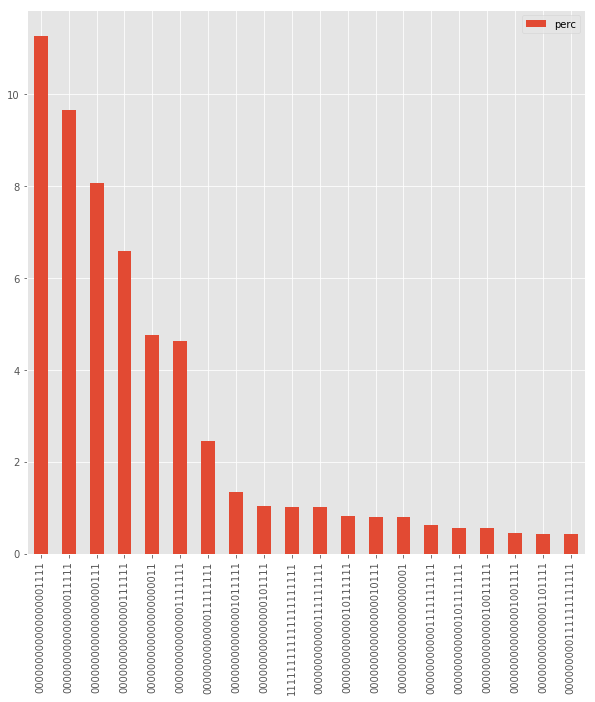

In [106]:
pattern_counts.sort_values('perc', ascending=False).head(20).drop('pattern',axis=1).plot.bar(figsize=(10,10))

In [107]:
decade_presence=bigram.presence.value_counts().to_frame()
decade_presence['perc']=round((decade_presence.presence/decade_presence.presence.sum())*100,3)
decade_presence.sort_index(inplace=True)
decade_presence

,presence,perc
2,75,0.868
3,431,4.986
4,801,9.265
5,1209,13.985
6,1220,14.112
7,1153,13.337
8,912,10.549
9,624,7.218
10,408,4.719
11,336,3.887


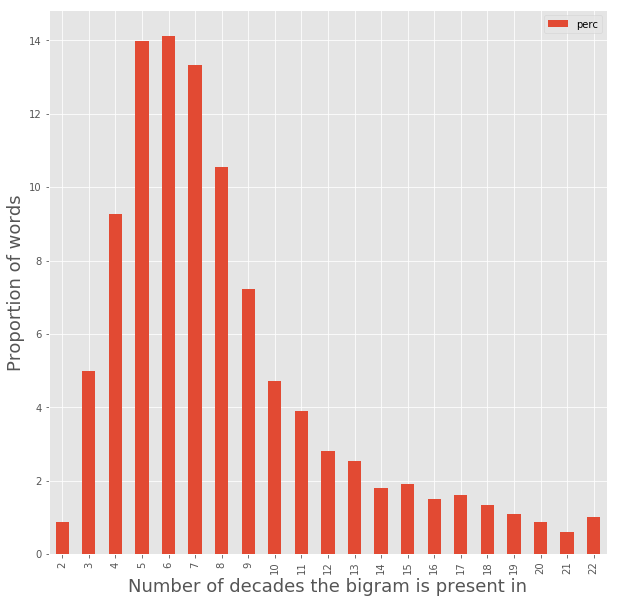

In [108]:
fig, ax = plt.subplots()
decade_presence.drop('presence',axis=1).plot.bar(ax=ax,figsize=(10,10))
plt.xlabel('Number of decades the bigram is present in', fontsize=18)
plt.ylabel('Proportion of words', fontsize=18)
plt.show()

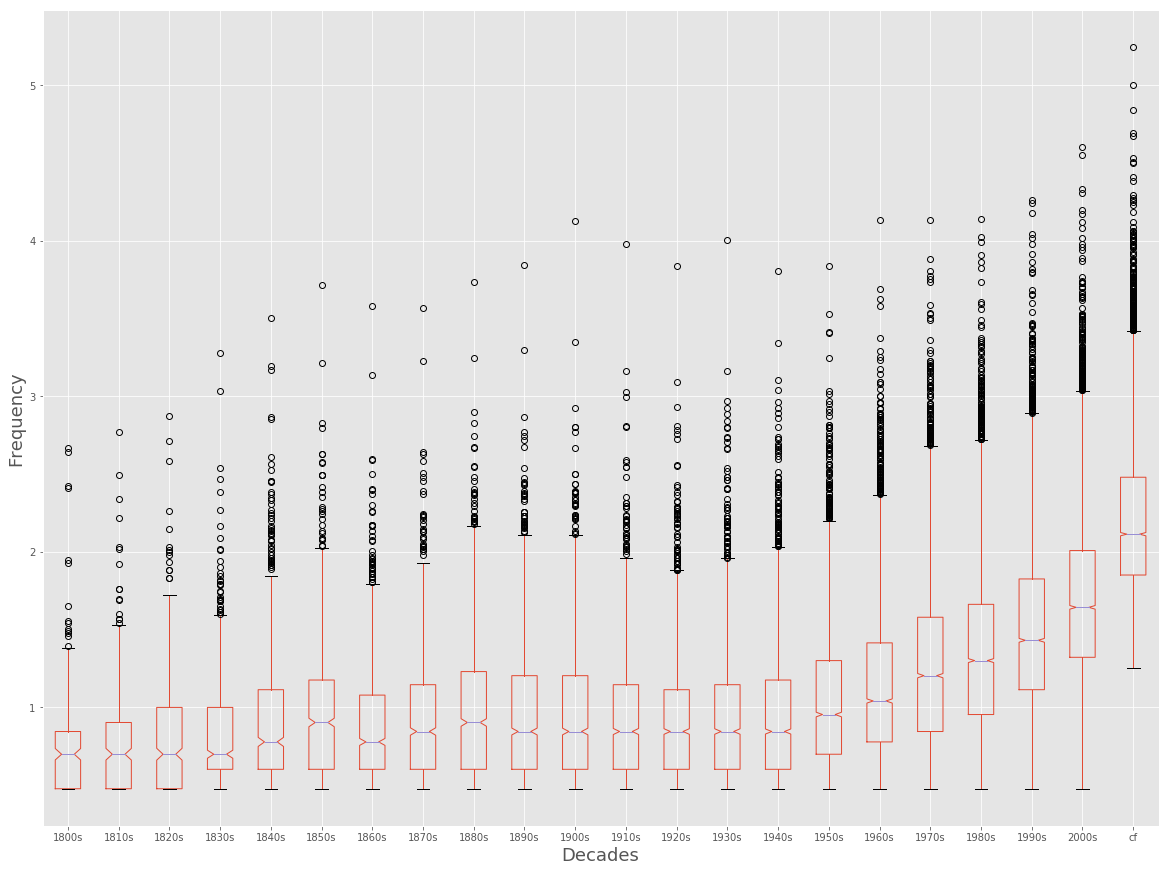

In [109]:
fig, ax = plt.subplots()
bigram.drop('presence',axis=1).plot.box(ax=ax,showfliers=True,figsize=(20,15),legend =True,notch=True)

plt.xlabel('Decades', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b502b7c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4b50d98390>]], dtype=object)

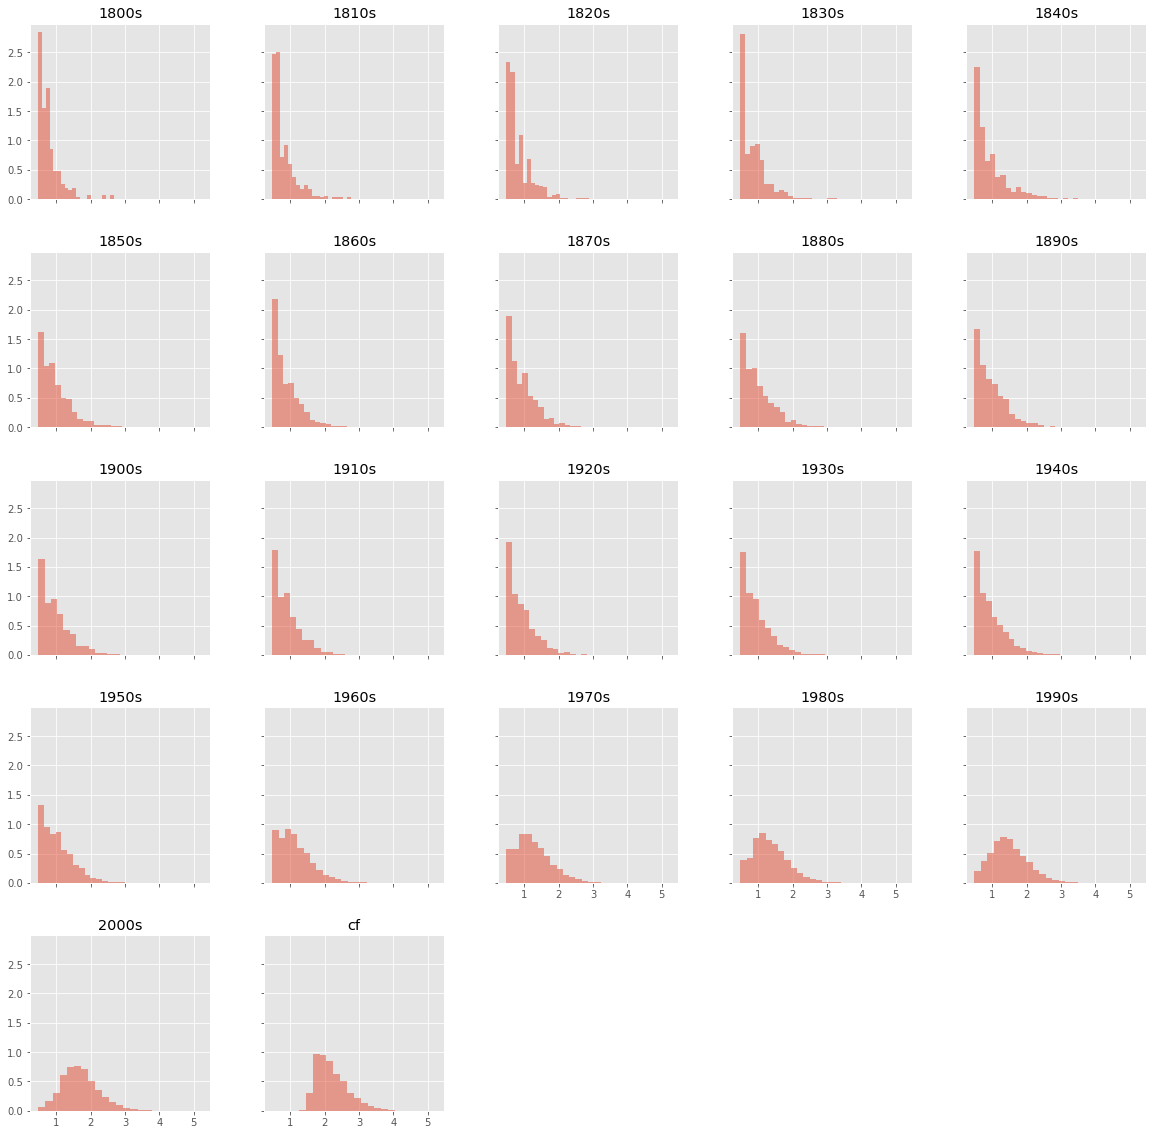

In [110]:
bigram.hist(figsize=(20,20),alpha=0.5,bins=20,normed=1,sharex=True,sharey=True)